We will create lots of documents with different classes c1, c2, c3, c4, c5

In [510]:
import nltk
from nltk.corpus import words
from nltk.corpus import stopwords
import random


### Inputs 

In [518]:
#Number of Categories
numCategories = 5
#let us generate 1000 documents with varying values of proportions
NDOCS = 1000


len(words.words())

236736

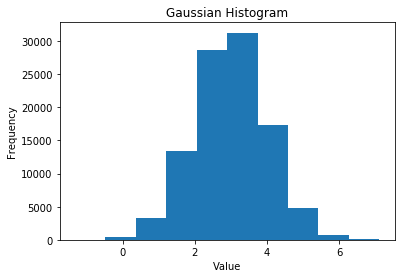

In [519]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.plotly as py
%matplotlib inline

#Set Seed and generaet Gaussian numbers - verufy through plot
np.random.seed(145)
gaussian_numbers = np.random.normal(loc=3, scale = 1 , size=100000)

plt.hist(gaussian_numbers)
plt.title("Gaussian Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")

fig = plt.gcf()


#### Generate probability distribution for each category

Here we create words commonly found in each category. We take all the words, divide it into N(=5) buckets and generate lots of words from each bucket centered around the midpoint of the bucket. By doing this we create distribution of words for each category. We store this distribution as raw data in each file ** category_sample_c1 ** to ** category_sample_c5 **

In [520]:
import os

np.random.seed(145)
step = int(len(words.words())/numCategories)
SAMPLE_BATCH_SIZE=10000

all_words = words.words()

def winsorize(x, winmin, winmax):
    if (x > winmax):
        return(winmax)
    if(x < winmin):
        return(winmin)   
    return(x)

for i in range(1,numCategories+1):
    meanRef = (i-1) * step + int(step/2)
    sdRef   = step/2
    print("Generating for " + "c{}".format(i)  + ":   meanRef={} sdRef={}".format(meanRef, sdRef))
    filename = "category_dist/category_sample_c{}".format(i)
    if os.path.exists(filename):
        os.remove(filename)
    f = open(filename, 'w')
    for j in range(0,10):
        gaussian_numbers = np.random.normal(loc=meanRef, scale = sdRef , size=SAMPLE_BATCH_SIZE)
        #those gone negative should be winsorized
        sampledWords = [all_words[winsorize(int(x), 0, len(all_words) - 1)] for x in gaussian_numbers]
        f.write("\n".join(sampledWords))
        f.write("\n")
    #close file
    f.close()

Generating for c1:   meanRef=23673 sdRef=23673.5
Generating for c2:   meanRef=71020 sdRef=23673.5
Generating for c3:   meanRef=118367 sdRef=23673.5
Generating for c4:   meanRef=165714 sdRef=23673.5
Generating for c5:   meanRef=213061 sdRef=23673.5


#### Data generation for documents

1. We generate 1000 documents of different categories by random sampling and save them in ** gen_data/cN ** folders



In [521]:
import shutil

#Create directories for data
for i in range(1,numCategories+1):
    dirname = "gen_data/c{}".format(i)
    if os.path.exists(dirname):
        print("Directory " + dirname + " exists, removing - and creating fresh..")
        shutil.rmtree(dirname) #os.rmdir(dirname)
    else:
        print("Directory " + dirname + "does not exist")
    os.makedirs(dirname)

Directory gen_data/c1 exists, removing - and creating fresh..
Directory gen_data/c2 exists, removing - and creating fresh..
Directory gen_data/c3 exists, removing - and creating fresh..
Directory gen_data/c4 exists, removing - and creating fresh..
Directory gen_data/c5 exists, removing - and creating fresh..


In [522]:
#Create documents for  all the categories
all_stop_words = stopwords.words('english')

from random import choices

def genDocument(size, categories, stopwordsProp = 0.30):
    sizeStopWords = int(stopwordsProp * size)
    sizeCategWords = size - sizeStopWords
    #print("sizeStopWords=%s" % sizeStopWords)
    #print("sizeCategWords=%s" % sizeCategWords)
    simulatedWords = []
    for key in categories.keys():
        prob = categories[key]
        filepath = "category_dist/category_sample_" + category
        with open(filepath, 'r') as f:
            lines = f.read().splitlines()
        simulatedWords.extend(choices(lines, k = int(prob*sizeCategWords)))
    #Mix with stopwords
    simulatedWords.extend(choices(all_stop_words, k = sizeStopWords))
    #Shuffle the list - inplace
    random.shuffle(simulatedWords)
    #print(simulatedWords)
    return(simulatedWords)

In [523]:
def getRandomProportionsDict(numCategories, jerk=0.8):
    props = np.random.uniform(0,1,numCategories)
    #jerk up one 
    jerkidx = random.randint(0,numCategories-1)
    props[jerkidx] += jerk
    props = props/sum(props)
    return(dict([("c{}".format(k), props[k-1]) for k in range(1, numCategories + 1)]))

print(getRandomProportionsDict(numCategories))

{'c1': 0.20438177821297476, 'c2': 0.13988434636996894, 'c3': 0.28430542349690635, 'c4': 0.22355974361005637, 'c5': 0.14786870831009352}


In [524]:
## Test
categories = getRandomProportionsDict(numCategories)
print(categories)
inverse = [(value, key) for key, value in categories.items()]
print(max(inverse)[1])

#print (genDocument(size = 1000,categories= {"c1": 0.5, "c2":0.3, "c5" : 0.2}, stopwordsProp=0.30))
print (" ".join( genDocument(size = 50,categories= {"c1": 0.5, "c2":0.3, "c5" : 0.2}, stopwordsProp=0.30)))

{'c1': 0.19675588492010507, 'c2': 0.27671131525507675, 'c3': 0.028981255629560391, 'c4': 0.47376211037493909, 'c5': 0.023789433820318708}
c4
sizeStopWords=15
sizeCategWords=35
bizonal administerial batster configurationally t bit ll be A halfheartedly those bibliothecarian those contraregular nor over A under doesn through biotical A cossas Crinoidea o can apeptic dramm A cockroach ma barreled archinfamy adventitia criobolium haven A fishtail amasser beclang agatoid anthropomorphically bloodthirst apocopate who colatorium A battleground elenchically


In [546]:
#let us generate 1000 documents with varying values of proportions
metaDataList = []
for i in range(0,NDOCS):
    categories = getRandomProportionsDict(numCategories)
    inverse = [(value, key) for key, value in categories.items()]
    max_categ = max(inverse)[1]
    #size of doc between 250 to 1500
    size = random.randint(250, 1500)
    doc       =  genDocument(size, categories, stopwordsProp = 0.30)
    doc       = " ".join(doc)
    filepath  =  "gen_data/{}/{}.doc".format(max_categ,i)
    print("Writing to file " + filepath)
    vals = [value for key, value in categories.items()]
    vals.extend(filepath)
    metaDataList.extend(vals)
    with open(filepath, 'w') as f:
            lines = f.write(doc)

sizeStopWords=319
sizeCategWords=747
Writing to file gen_data/c4/0.doc
sizeStopWords=77
sizeCategWords=182
Writing to file gen_data/c5/1.doc
sizeStopWords=123
sizeCategWords=289
Writing to file gen_data/c3/2.doc
sizeStopWords=202
sizeCategWords=472
Writing to file gen_data/c5/3.doc
sizeStopWords=138
sizeCategWords=324
Writing to file gen_data/c2/4.doc
sizeStopWords=343
sizeCategWords=802
Writing to file gen_data/c3/5.doc
sizeStopWords=126
sizeCategWords=295
Writing to file gen_data/c4/6.doc
sizeStopWords=327
sizeCategWords=766
Writing to file gen_data/c3/7.doc
sizeStopWords=220
sizeCategWords=515
Writing to file gen_data/c5/8.doc
sizeStopWords=129
sizeCategWords=303
Writing to file gen_data/c5/9.doc
sizeStopWords=408
sizeCategWords=954
Writing to file gen_data/c5/10.doc
sizeStopWords=433
sizeCategWords=1011
Writing to file gen_data/c3/11.doc
sizeStopWords=258
sizeCategWords=605
Writing to file gen_data/c3/12.doc
sizeStopWords=292
sizeCategWords=683
Writing to file gen_data/c1/13.doc
si

Writing to file gen_data/c2/118.doc
sizeStopWords=114
sizeCategWords=267
Writing to file gen_data/c2/119.doc
sizeStopWords=324
sizeCategWords=758
Writing to file gen_data/c4/120.doc
sizeStopWords=420
sizeCategWords=982
Writing to file gen_data/c2/121.doc
sizeStopWords=340
sizeCategWords=795
Writing to file gen_data/c2/122.doc
sizeStopWords=200
sizeCategWords=468
Writing to file gen_data/c4/123.doc
sizeStopWords=246
sizeCategWords=575
Writing to file gen_data/c4/124.doc
sizeStopWords=300
sizeCategWords=702
Writing to file gen_data/c5/125.doc
sizeStopWords=427
sizeCategWords=997
Writing to file gen_data/c3/126.doc
sizeStopWords=80
sizeCategWords=189
Writing to file gen_data/c3/127.doc
sizeStopWords=145
sizeCategWords=340
Writing to file gen_data/c5/128.doc
sizeStopWords=108
sizeCategWords=252
Writing to file gen_data/c1/129.doc
sizeStopWords=279
sizeCategWords=652
Writing to file gen_data/c4/130.doc
sizeStopWords=89
sizeCategWords=210
Writing to file gen_data/c3/131.doc
sizeStopWords=292

Writing to file gen_data/c1/231.doc
sizeStopWords=93
sizeCategWords=217
Writing to file gen_data/c5/232.doc
sizeStopWords=411
sizeCategWords=959
Writing to file gen_data/c1/233.doc
sizeStopWords=366
sizeCategWords=856
Writing to file gen_data/c1/234.doc
sizeStopWords=214
sizeCategWords=502
Writing to file gen_data/c3/235.doc
sizeStopWords=281
sizeCategWords=657
Writing to file gen_data/c5/236.doc
sizeStopWords=239
sizeCategWords=558
Writing to file gen_data/c1/237.doc
sizeStopWords=117
sizeCategWords=276
Writing to file gen_data/c3/238.doc
sizeStopWords=314
sizeCategWords=733
Writing to file gen_data/c1/239.doc
sizeStopWords=180
sizeCategWords=423
Writing to file gen_data/c4/240.doc
sizeStopWords=265
sizeCategWords=621
Writing to file gen_data/c5/241.doc
sizeStopWords=181
sizeCategWords=425
Writing to file gen_data/c4/242.doc
sizeStopWords=223
sizeCategWords=521
Writing to file gen_data/c4/243.doc
sizeStopWords=256
sizeCategWords=600
Writing to file gen_data/c5/244.doc
sizeStopWords=17

Writing to file gen_data/c4/345.doc
sizeStopWords=358
sizeCategWords=837
Writing to file gen_data/c4/346.doc
sizeStopWords=258
sizeCategWords=602
Writing to file gen_data/c1/347.doc
sizeStopWords=101
sizeCategWords=237
Writing to file gen_data/c4/348.doc
sizeStopWords=345
sizeCategWords=807
Writing to file gen_data/c3/349.doc
sizeStopWords=165
sizeCategWords=385
Writing to file gen_data/c2/350.doc
sizeStopWords=422
sizeCategWords=987
Writing to file gen_data/c5/351.doc
sizeStopWords=338
sizeCategWords=790
Writing to file gen_data/c1/352.doc
sizeStopWords=190
sizeCategWords=444
Writing to file gen_data/c2/353.doc
sizeStopWords=400
sizeCategWords=936
Writing to file gen_data/c3/354.doc
sizeStopWords=196
sizeCategWords=458
Writing to file gen_data/c4/355.doc
sizeStopWords=405
sizeCategWords=946
Writing to file gen_data/c3/356.doc
sizeStopWords=446
sizeCategWords=1041
Writing to file gen_data/c3/357.doc
sizeStopWords=225
sizeCategWords=525
Writing to file gen_data/c4/358.doc
sizeStopWords=

Writing to file gen_data/c2/458.doc
sizeStopWords=152
sizeCategWords=356
Writing to file gen_data/c3/459.doc
sizeStopWords=224
sizeCategWords=525
Writing to file gen_data/c4/460.doc
sizeStopWords=335
sizeCategWords=783
Writing to file gen_data/c5/461.doc
sizeStopWords=448
sizeCategWords=1047
Writing to file gen_data/c5/462.doc
sizeStopWords=117
sizeCategWords=275
Writing to file gen_data/c1/463.doc
sizeStopWords=171
sizeCategWords=400
Writing to file gen_data/c4/464.doc
sizeStopWords=174
sizeCategWords=406
Writing to file gen_data/c3/465.doc
sizeStopWords=207
sizeCategWords=485
Writing to file gen_data/c5/466.doc
sizeStopWords=350
sizeCategWords=818
Writing to file gen_data/c1/467.doc
sizeStopWords=324
sizeCategWords=757
Writing to file gen_data/c1/468.doc
sizeStopWords=423
sizeCategWords=989
Writing to file gen_data/c3/469.doc
sizeStopWords=164
sizeCategWords=385
Writing to file gen_data/c4/470.doc
sizeStopWords=228
sizeCategWords=535
Writing to file gen_data/c2/471.doc
sizeStopWords=

sizeCategWords=525
Writing to file gen_data/c2/576.doc
sizeStopWords=436
sizeCategWords=1018
Writing to file gen_data/c4/577.doc
sizeStopWords=408
sizeCategWords=953
Writing to file gen_data/c5/578.doc
sizeStopWords=300
sizeCategWords=701
Writing to file gen_data/c2/579.doc
sizeStopWords=242
sizeCategWords=566
Writing to file gen_data/c4/580.doc
sizeStopWords=342
sizeCategWords=800
Writing to file gen_data/c5/581.doc
sizeStopWords=145
sizeCategWords=340
Writing to file gen_data/c5/582.doc
sizeStopWords=97
sizeCategWords=229
Writing to file gen_data/c1/583.doc
sizeStopWords=247
sizeCategWords=578
Writing to file gen_data/c3/584.doc
sizeStopWords=197
sizeCategWords=460
Writing to file gen_data/c1/585.doc
sizeStopWords=412
sizeCategWords=962
Writing to file gen_data/c1/586.doc
sizeStopWords=175
sizeCategWords=411
Writing to file gen_data/c4/587.doc
sizeStopWords=294
sizeCategWords=687
Writing to file gen_data/c1/588.doc
sizeStopWords=203
sizeCategWords=476
Writing to file gen_data/c3/589.

Writing to file gen_data/c4/690.doc
sizeStopWords=226
sizeCategWords=530
Writing to file gen_data/c1/691.doc
sizeStopWords=206
sizeCategWords=482
Writing to file gen_data/c1/692.doc
sizeStopWords=188
sizeCategWords=440
Writing to file gen_data/c4/693.doc
sizeStopWords=444
sizeCategWords=1039
Writing to file gen_data/c2/694.doc
sizeStopWords=327
sizeCategWords=764
Writing to file gen_data/c2/695.doc
sizeStopWords=434
sizeCategWords=1013
Writing to file gen_data/c4/696.doc
sizeStopWords=312
sizeCategWords=728
Writing to file gen_data/c5/697.doc
sizeStopWords=348
sizeCategWords=814
Writing to file gen_data/c5/698.doc
sizeStopWords=322
sizeCategWords=754
Writing to file gen_data/c3/699.doc
sizeStopWords=210
sizeCategWords=492
Writing to file gen_data/c3/700.doc
sizeStopWords=321
sizeCategWords=750
Writing to file gen_data/c5/701.doc
sizeStopWords=172
sizeCategWords=403
Writing to file gen_data/c4/702.doc
sizeStopWords=295
sizeCategWords=689
Writing to file gen_data/c4/703.doc
sizeStopWords

Writing to file gen_data/c4/808.doc
sizeStopWords=280
sizeCategWords=655
Writing to file gen_data/c3/809.doc
sizeStopWords=283
sizeCategWords=663
Writing to file gen_data/c5/810.doc
sizeStopWords=166
sizeCategWords=390
Writing to file gen_data/c2/811.doc
sizeStopWords=229
sizeCategWords=536
Writing to file gen_data/c4/812.doc
sizeStopWords=413
sizeCategWords=966
Writing to file gen_data/c1/813.doc
sizeStopWords=135
sizeCategWords=318
Writing to file gen_data/c3/814.doc
sizeStopWords=167
sizeCategWords=391
Writing to file gen_data/c4/815.doc
sizeStopWords=402
sizeCategWords=938
Writing to file gen_data/c3/816.doc
sizeStopWords=213
sizeCategWords=499
Writing to file gen_data/c3/817.doc
sizeStopWords=223
sizeCategWords=521
Writing to file gen_data/c4/818.doc
sizeStopWords=110
sizeCategWords=258
Writing to file gen_data/c1/819.doc
sizeStopWords=412
sizeCategWords=962
Writing to file gen_data/c2/820.doc
sizeStopWords=178
sizeCategWords=416
Writing to file gen_data/c4/821.doc
sizeStopWords=2

Writing to file gen_data/c1/921.doc
sizeStopWords=316
sizeCategWords=739
Writing to file gen_data/c5/922.doc
sizeStopWords=442
sizeCategWords=1034
Writing to file gen_data/c4/923.doc
sizeStopWords=220
sizeCategWords=515
Writing to file gen_data/c1/924.doc
sizeStopWords=413
sizeCategWords=966
Writing to file gen_data/c4/925.doc
sizeStopWords=107
sizeCategWords=251
Writing to file gen_data/c4/926.doc
sizeStopWords=356
sizeCategWords=832
Writing to file gen_data/c4/927.doc
sizeStopWords=139
sizeCategWords=325
Writing to file gen_data/c4/928.doc
sizeStopWords=110
sizeCategWords=259
Writing to file gen_data/c5/929.doc
sizeStopWords=441
sizeCategWords=1031
Writing to file gen_data/c3/930.doc
sizeStopWords=374
sizeCategWords=875
Writing to file gen_data/c1/931.doc
sizeStopWords=360
sizeCategWords=842
Writing to file gen_data/c3/932.doc
sizeStopWords=427
sizeCategWords=997
Writing to file gen_data/c4/933.doc
sizeStopWords=407
sizeCategWords=952
Writing to file gen_data/c5/934.doc
sizeStopWords

In [525]:
categories = getRandomProportionsDict(numCategories)

In [526]:
categories

{'c1': 0.049028195347408016,
 'c2': 0.028449524733189752,
 'c3': 0.24384859975591097,
 'c4': 0.61586672978503187,
 'c5': 0.062806950378459445}

In [528]:
cp = categories.copy()
cp["Hello"] = "JJ"
cp

{'Hello': 'JJ',
 'c1': 0.049028195347408016,
 'c2': 0.028449524733189752,
 'c3': 0.24384859975591097,
 'c4': 0.61586672978503187,
 'c5': 0.062806950378459445}

In [530]:
inverse = [(value, key) for key, value in cp.items()]
inverse

[(0.049028195347408016, 'c1'),
 (0.028449524733189752, 'c2'),
 (0.24384859975591097, 'c3'),
 (0.61586672978503187, 'c4'),
 (0.062806950378459445, 'c5'),
 ('JJ', 'Hello')]

In [545]:
import pandas as pd
pd.DataFrame([(1,2,3,4)], columns=["A", "B", "C", "D"])

,A,B,C,D
0,1,2,3,4
